# Global GDP Exploratory Data Analysis

## Preprocessing of Datasets

Normalize data

Handle missing values

Merge datasets to get full GDP data

### Data source

Data from **Kaggle**

GDP data from 1960-2020, **Ozgur Cem Tas**: https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths

GDP data from 2020-2025, **Nadiia**: https://www.kaggle.com/datasets/codebynadiia/gdp-per-country-20202025

In [47]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [48]:
# load raw data files
data1960 = pd.read_csv("./data/1960-2020.csv")
data1960.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [49]:
data2020 = pd.read_csv("./data/2020-2025.csv")
data2020.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [50]:
data2020.info()

<class 'pandas.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    str    
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), str(1)
memory usage: 10.8 KB


In [51]:
data1960.info()

<class 'pandas.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    str    
 1   Code          266 non-null    str    
 2   1960          128 non-null    float64
 3   1961          134 non-null    float64
 4   1962          137 non-null    float64
 5   1963          137 non-null    float64
 6   1964          137 non-null    float64
 7   1965          148 non-null    float64
 8   1966          151 non-null    float64
 9   1967          154 non-null    float64
 10  1968          159 non-null    float64
 11  1969          159 non-null    float64
 12  1970          168 non-null    float64
 13  1971          171 non-null    float64
 14  1972          171 non-null    float64
 15  1973          171 non-null    float64
 16  1974          172 non-null    float64
 17  1975          174 non-null    float64
 18  1976          175 non-null    float64
 19

## Reformat to long format

instead of wide format.

In [52]:
data1960 = data1960.melt(id_vars=['Country Name', 'Code'], var_name='Year', value_name='GDP')
data1960.head()

,Country Name,Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,1.931311e+10
2,Afghanistan,AFG,1960,5.377778e+08
3,Africa Western and Central,AFW,1960,1.040428e+10
4,Angola,AGO,1960,NaN


In [53]:
data2020 = data2020.melt(id_vars=['Country'], var_name='Year', value_name='GDP')
data2020.head()

,Country,Year,GDP
0,Afghanistan,2020,20136.0
1,Albania,2020,15271.0
2,Algeria,2020,164774.0
3,Andorra,2020,2885.0
4,Angola,2020,66521.0


## Scale datasets to match

1960-> has no rounding

2020-> has been rounded to millions

**Scale both to billions**

In [54]:
# copies of original for long format
data1960_long = data1960.copy()
data2020_long = data2020.copy()

In [55]:
# 1. Convert Raw Dollars -> Billions
data1960_long['GDP'] = data1960_long['GDP'] / 1_000_000_000

# 2. Round to 2 decimal places
data1960_long['GDP'] = data1960_long['GDP'].round(2)
data1960_long.head(30)

,Country Name,Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,19.31
2,Afghanistan,AFG,1960,0.54
3,Africa Western and Central,AFW,1960,10.40
4,Angola,AGO,1960,NaN
5,Albania,ALB,1960,NaN
6,Andorra,AND,1960,NaN
7,Arab World,ARB,1960,NaN
8,United Arab Emirates,ARE,1960,NaN
9,Argentina,ARG,1960,NaN


In [56]:
# Convert Millions to Billions
data2020_long['GDP'] = data2020_long['GDP'] / 1000

# Round to 2 decimals for cleanliness
data2020_long['GDP'] = data2020_long['GDP'].round(2)
data2020_long.head()

,Country,Year,GDP
0,Afghanistan,2020,20.14
1,Albania,2020,15.27
2,Algeria,2020,164.77
3,Andorra,2020,2.88
4,Angola,2020,66.52


## Remove unwanted data

In [ ]:
# remove year "Unnamed: 65" 
data1960_long = data1960_long[data1960_long['Year'] != 'Unnamed: 65']       

In [60]:
# remove Code column
data1960_long = data1960_long.drop(columns=['Code'])

## Visualizations & Analysis

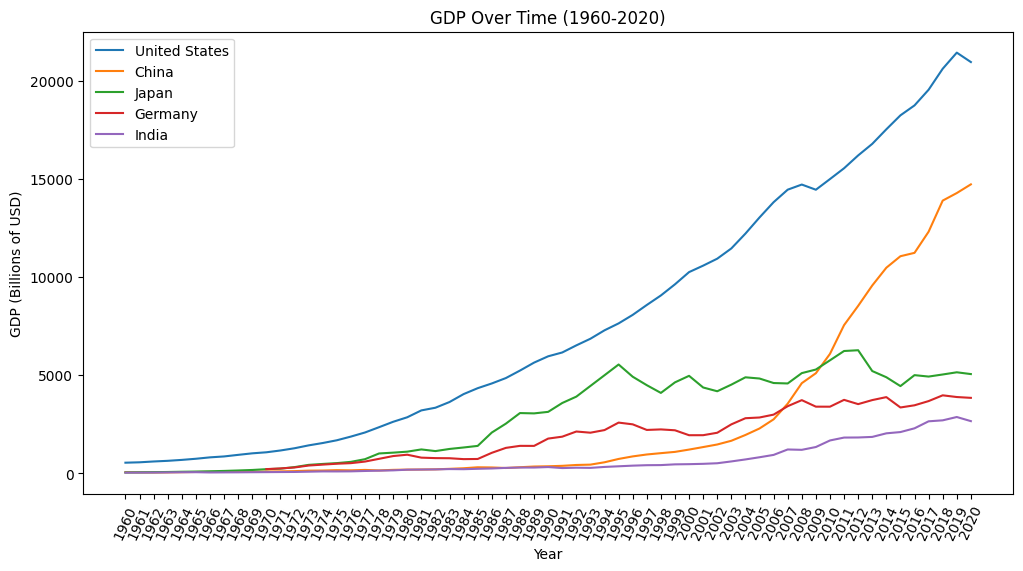

In [66]:
# basic line plot of GDP over time for a few countries
countries_of_interest = ['United States', 'China', 'Japan', 'Germany', 'India']
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = data1960_long[data1960_long['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], label=country)

plt.title('GDP Over Time (1960-2020)')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of USD)')
plt.legend()
plt.xticks(rotation=65)
plt.show()